A small script to model effective mana costs of different MTG cards

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def match(price,hand):
    h = hand.copy()
    flag = True
    for i in range(len(price)):
        if price[i]>0: # real color
            if price[i] in h:
                h.remove(price[i])
            else:
                flag = False
        else:
            if 1 in h:
                h.remove(1)
            elif 2 in h:
                h.remove(2)
            else:
                flag = False
            
    return flag

In [3]:
def count_lands(hand,landType=0):
    landCount = 0
    for i in range(len(hand)):
        if landType==0: # Count all lands
            if hand[i]<=2:
                landCount += 1
        else:           # Count some specific type of lands
            if hand[i]==landType:
                landCount += 1
            
    return landCount

In [4]:
nCards = 40
nLands = 17
nColor1 = 8
iRuns = 1000
prices = ([0,0] , [1,0] , [1,1] , [1,0,0] , [2,0] , [1,2])  # 1 and 2 for two types of mana, 0 for colorless

In [5]:
minLands = 4  # Avoid most extreme land combinations (like 16/17 plains when you have red cards)
data = np.zeros([len(prices),nLands-minLands*2+1])

In [6]:
for iPrice in range(len(prices)):
    price = prices[iPrice]
    for nColor1 in range(minLands,nLands-minLands+1):
        res = []
        for iRun in range(iRuns):
            deck = [2]*nColor1 + [1]*(nLands-nColor1) + [3]*(nCards-nLands)

            happy = 0
            handSize = 7
            while not happy: # Mulligan if necessary
                hand = np.random.choice(deck,handSize,replace=False).tolist()
                nl = count_lands(hand)
                if (nl>2 and nl<6) or handSize==4:
                    happy = 1
                else:
                    handSize -= 1

            # Technically here we skry one, but let's skip it for now

            for i in range(len(hand)):
                deck.remove(hand[i])

            lands = [] # Lands on the table

            #print(hand)

            turn = 0
            canPlay = 0
            while not match(price,lands):
                turn += 1
                if turn>1: # if we go first, skip draw on turn 1
                    hand = hand + np.random.choice(deck,1).tolist() # Draw

                # Which land to play?
                landPlayed = 0
                for i in range(len(price)):
                    if not landPlayed:
                        # If colored mana symbol, and not yet on the field, and present in hand - place this one
                        #print("  ",i,price[i],lands, price[i] in lands)
                        if price[i]>0 and (not (price[i] in lands)) and  (price[i] in hand):
                            lands += [price[i]]
                            hand.remove(price[i])
                            landPlayed = 1
                            break
                if not landPlayed: # At this point, try to place any land
                    if 1 in hand:
                        lands += [1]
                        hand.remove(1)
                    elif 2 in hand:
                        lands += [2]
                        hand.remove(2)
                #print(hand)

            res.append(turn)

        data[iPrice,nColor1-minLands] = np.mean(res)

In [20]:
num2color = {0:"1" , 1:"W" , 2:"R"}
prices2 = []
for p in prices:
    temp = ''
    for i in p:
        temp += num2color[i]
    prices2.append(temp)
    
prices2;

Text(0,0.5,'Average turn # to play the card')

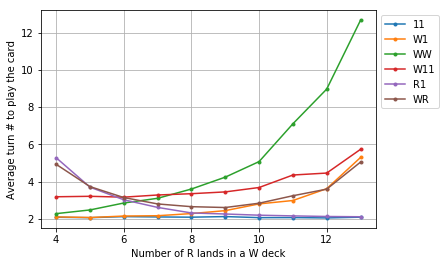

In [22]:
plt.plot(range(minLands,nLands-minLands+1),data.transpose(),'.-')
plt.legend(prices2,bbox_to_anchor=(1, 1.0))
plt.grid()
plt.xlabel('Number of R lands in a W deck');
plt.ylabel('Average turn # to play the card')

Text(0,0.5,'Playable turn, relative to 10')

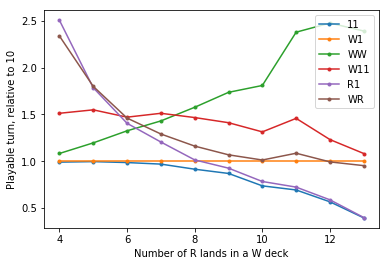

In [23]:
dataNorm = data.transpose()
benchmark = dataNorm[:,1]
dataNorm = dataNorm / benchmark[:,None]
plt.plot(range(minLands,nLands-minLands+1),dataNorm,'.-')
plt.legend(prices2)
plt.xlabel('Number of R lands in a W deck');
plt.ylabel('Playable turn, relative to 10')